In [1]:
import h5py
import matplotlib.pyplot as plt
import os
from enum import Enum
import numpy as np
import vector
from distillnet_config import dirs

In [2]:
filedir = dirs['filedir']
sample = 'distill_ttbar_emd_prl.h5'

In [3]:
class fl_inputs(Enum):  #features of data
    px = 0
    py = 1
    pz = 2
    e = 3
    d0 = 4
    dz = 5 
    puppiw = 6
    charge = 7
    pid_1 = 8
    pid_2 = 9
    pid_3 = 10
    pid_4 = 11
    pid_5 = 12
    pid_6 =13
    pid_7 = 14
    pid_8  = 15
    
class fl_vecs(Enum):
    px = 0
    py = 1
    pz = 2
    e = 3
    wgt = 4
    
flist_inputs = [member.value for member in fl_inputs]
flist_names = [member.name for member in fl_inputs]
flist_oldnet =  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,11,12, 16, 17]

print(flist_inputs)
print(flist_names)
print(len(flist_inputs))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
['px', 'py', 'pz', 'e', 'd0', 'dz', 'puppiw', 'charge', 'pid_1', 'pid_2', 'pid_3', 'pid_4', 'pid_5', 'pid_6', 'pid_7', 'pid_8']
16


In [ ]:
def convertvec_etaphipt(p_vec, Is_log: bool = False):
    vec_input = vector.array({'px':p_vec[:,0],'py':p_vec[:,1],'pz':p_vec[:,2],'energy':p_vec[:,3]})
    p_vec[:,0],p_vec[:,1],p_vec[:,2] = vec_input.eta, vec_input.phi, vec_input.pt
    if Is_log:
        p_vec[:,2],p_vec[:,3] = np.log(p_vec[:,2]), np.log(p_vec[:,3])
        return
    return

Exploring  /work/tbrandes/work/data/distill_ttbar_emd_prl.h5
<KeysViewHDF5 ['data_abc', 'data_gen', 'data_nopu', 'data_puppi', 'distill_inputs_default']>
Shape of GNN soft truth labels (8300, 9000)
Total num soft GNN weights (74700000,)
Shape of Puppi labels (8300, 9000)
Total num puppi weights (74700000,)


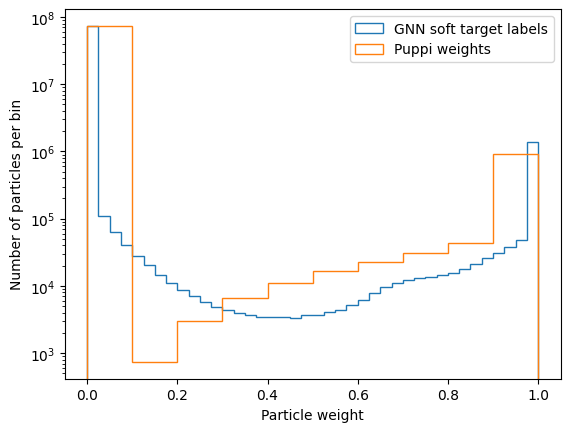

Shape of selected input features  (16, 8300, 9000)
Shape of input features  (74700000, 16)


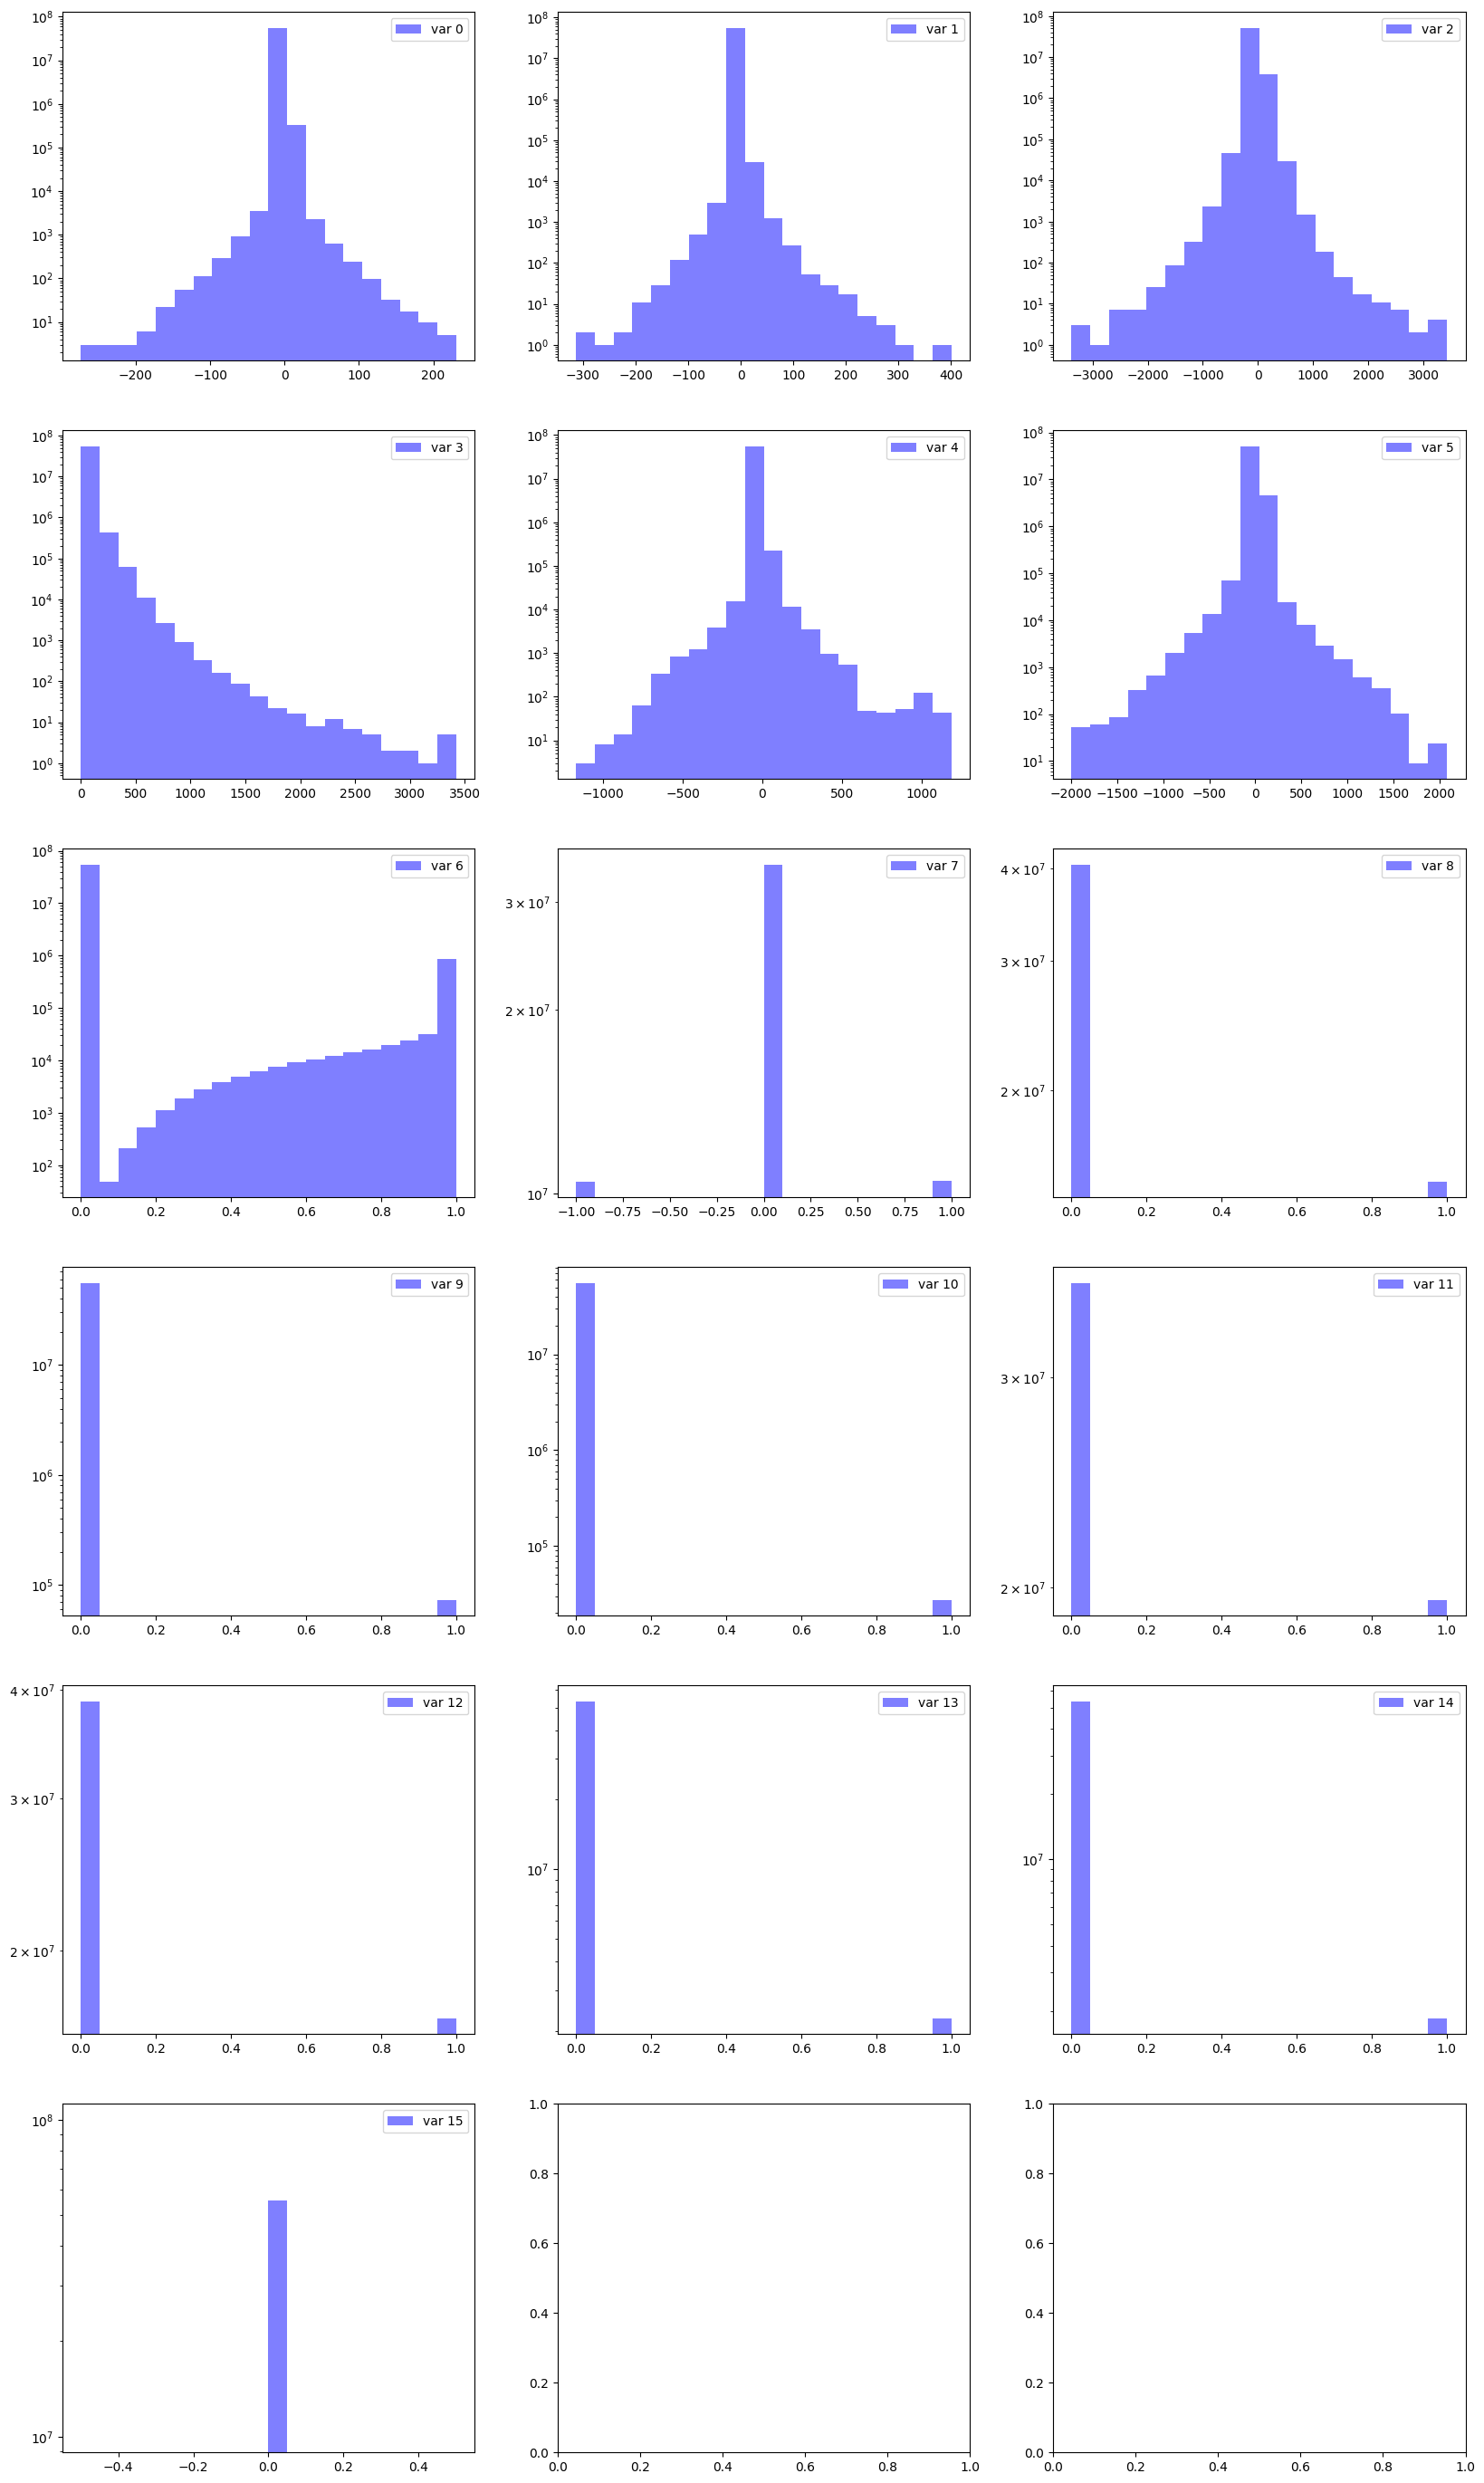

-1170.9424
-1998.2794


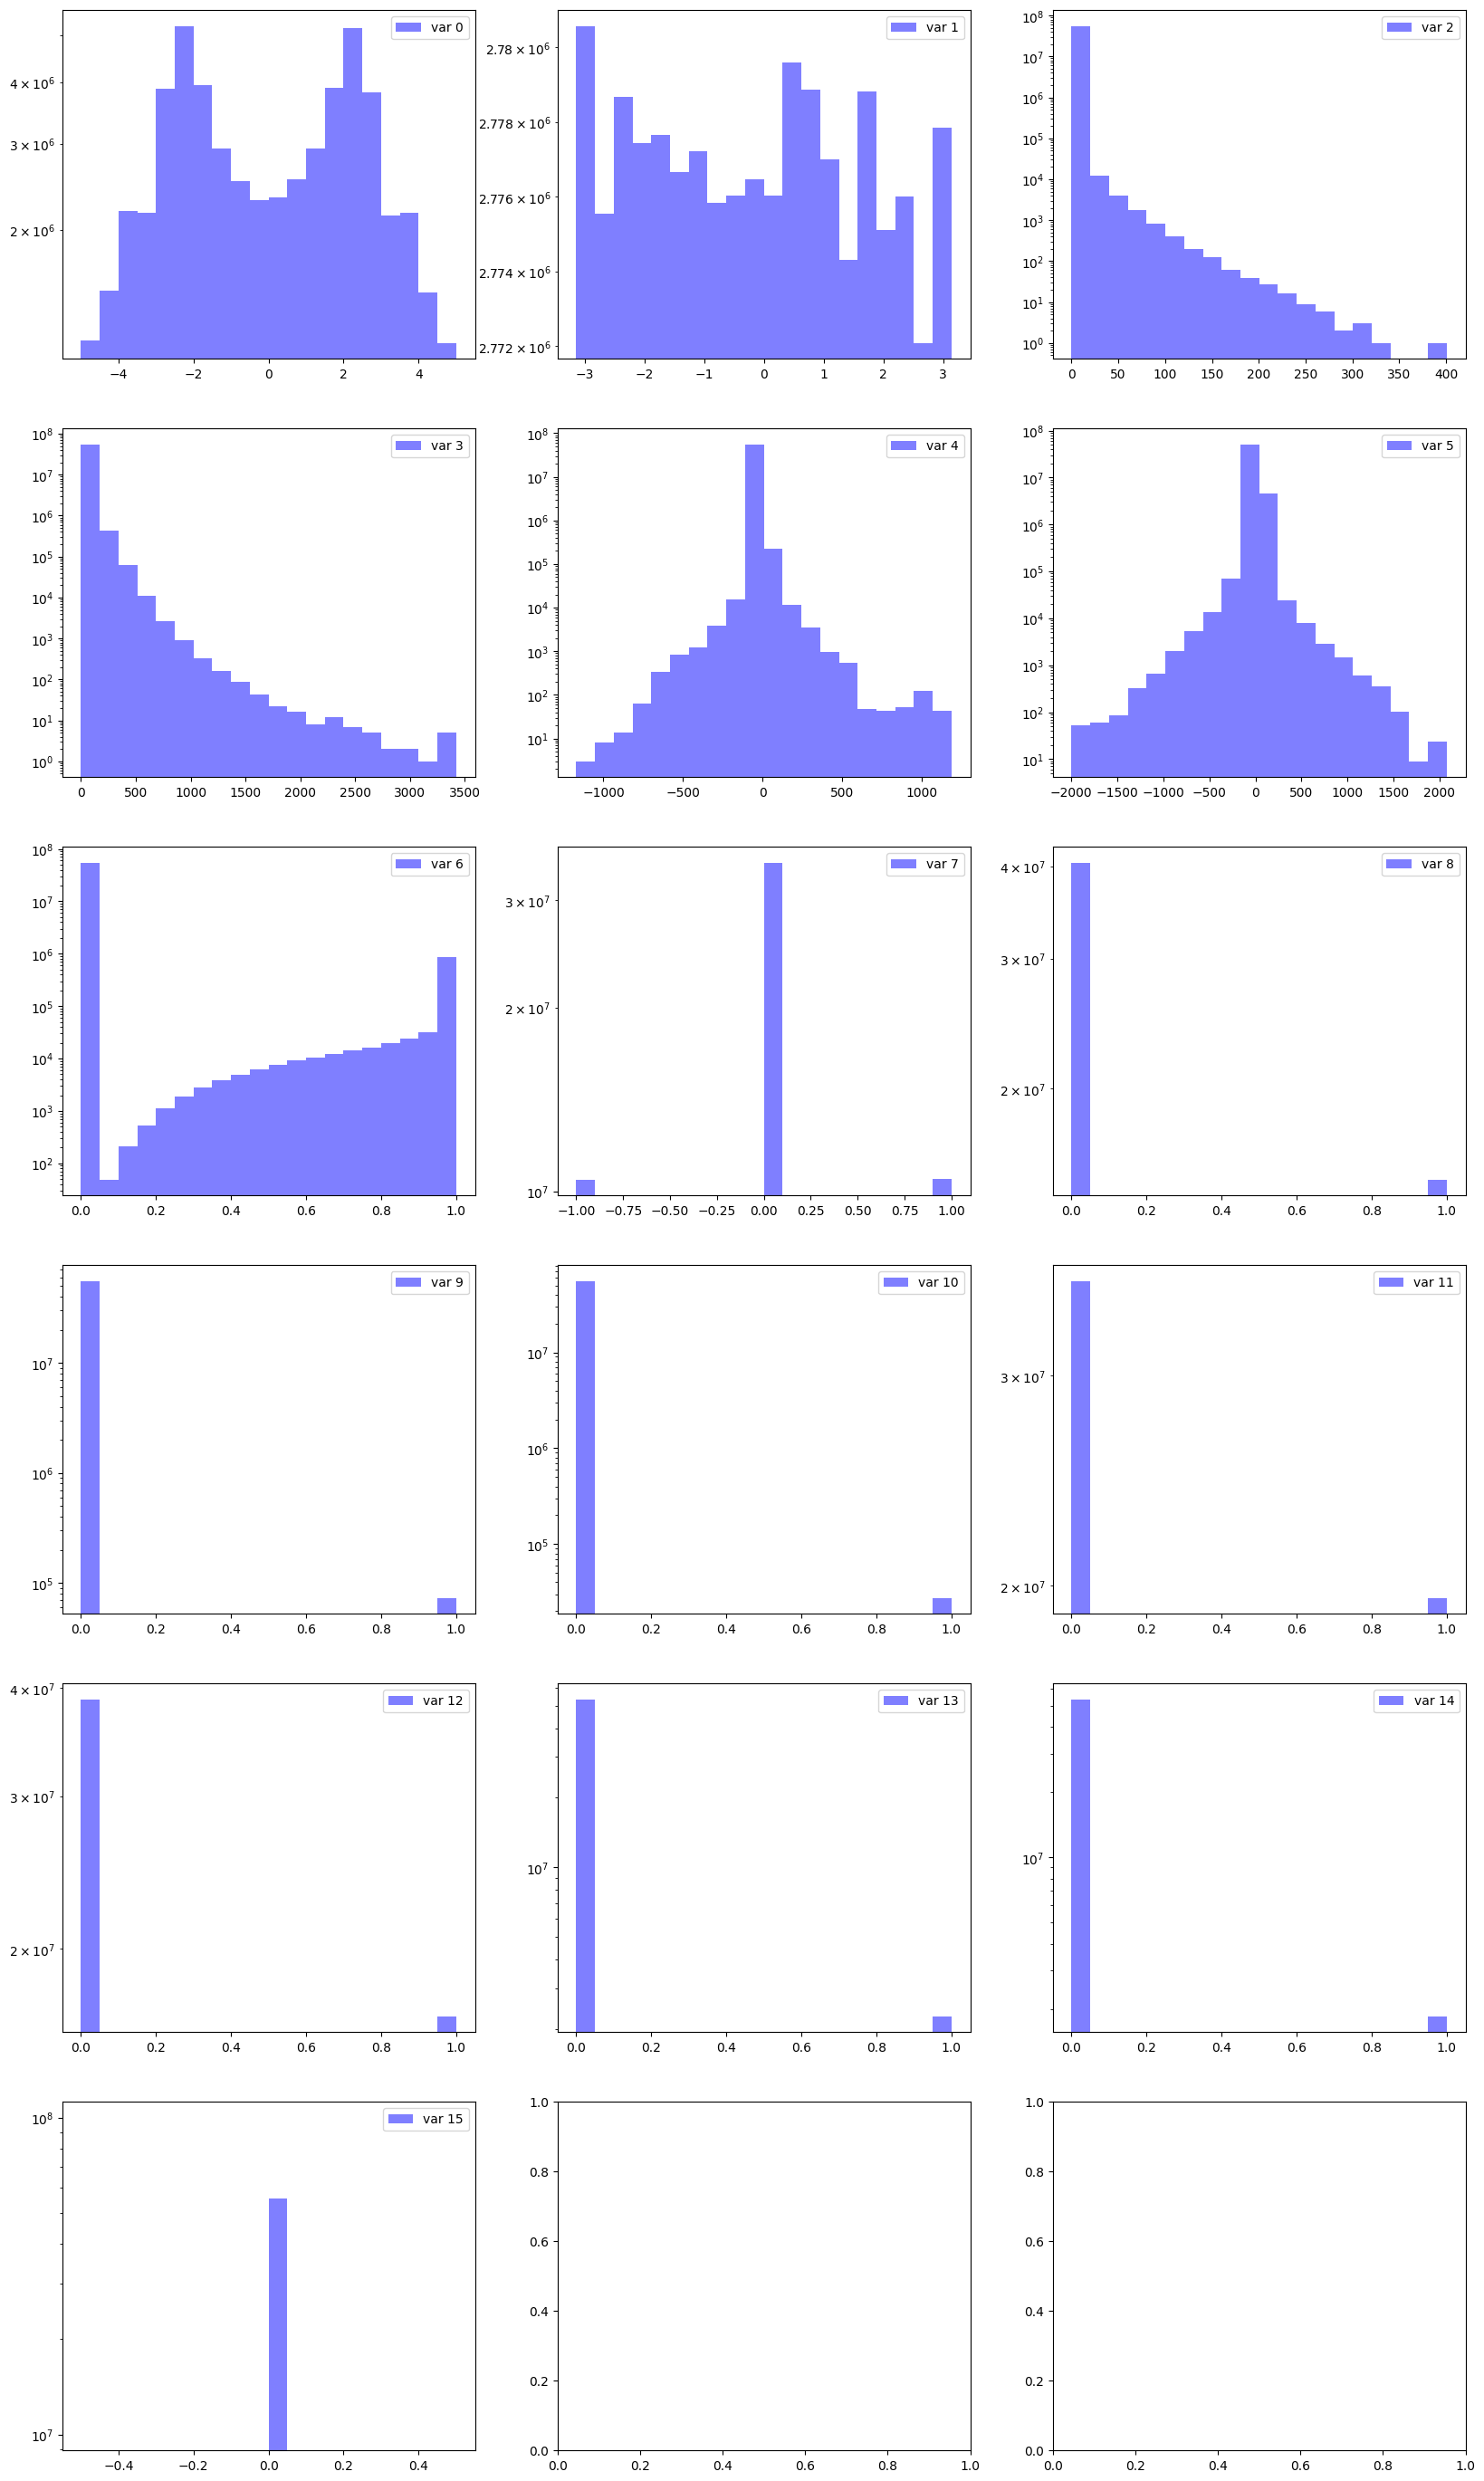

In [4]:


filename = os.path.join(filedir, sample)
print('Exploring ', filename)

with h5py.File(filename, "r") as f:
    print('File keys: ', f.keys())
    featurelist = f["distill_inputs_default"][flist_inputs, :, :]
    
    abc_truth = f['data_abc'][4,:,:]
    print('Shape of GNN soft truth labels', abc_truth.shape)
    abc_concat = np.concatenate(abc_truth)
    print('Total num soft GNN weights', abc_concat.shape)
    plt.hist(abc_concat,histtype='step',bins=40,range=(0,1), label='GNN soft target labels')
    
    puppi_weights = f['data_puppi'][4,:,:]
    print('Shape of Puppi labels', puppi_weights.shape)

    puppi_weights = np.concatenate(puppi_weights)
    print('Total num puppi weights', puppi_weights.shape)

    plt.hist(puppi_weights,histtype='step',,bins=40,range=(0,1),label='Puppi weights')
    plt.yscale("log")
    plt.legend()
    plt.xlabel('Particle weight')
    plt.ylabel('Number of particles per bin')
    plt.show()
    print('Shape of selected input features ', featurelist.shape)
    n_features, n_events, n_particles = featurelist.shape
    features_reshaped = featurelist.reshape( n_features, -1).T
    abc_truth_reshaped = abc_truth.reshape(1,-1).T
    print('Shape of per particle input features ', features_reshaped.shape)
    Is_remove_padding = True
    Is_standard = True
    if Is_remove_padding:
        padmask_px = np.abs(features_reshaped[:,0]) > 0.000001
        features_nopad, abc_nopad = features_reshaped[padmask_px], abc_truth_reshaped[padmask_px]
    fig,ax = plt.subplots(nrows=6,ncols=3,figsize=(20,35))
    for j in range(0,len(featurelist[:,0,0])):
        ax = plt.subplot(6, 3, j + 1)
        bins = ax.hist(features_nopad[:,j],label=f"var {j}",bins=20,color='b',alpha=0.5)
        ax.set_yscale('log')
        ax.legend()
    plt.show()

    convertvec_etaphipt(features_nopad, Is_log = False)
    d0min, dzmin = np.amin(features_nopad[:,4]), np.amin(features_nopad[:,5])
 
    fig,ax = plt.subplots(nrows=6,ncols=3,figsize=(20,35))
    for j in range(0,len(featurelist[:,0,0])):
        ax = plt.subplot(6, 3, j + 1)
        bins = ax.hist(features_nopad[:,j],label=f"var {j}",bins=20,color='b',alpha=0.5)
        ax.set_yscale('log')
        ax.legend()
    plt.show()
